In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from scipy import stats
import time

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

## import custom helper functions
import helpers as h

In [28]:
econ = pd.read_csv("data/Chicago_Socioeconomic.csv")

In [54]:
econ.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [56]:
newEconColumns = ["CommunityAreaNumber", "CommunityAreaName", "PercentHousingCrowded", \
                  "PercentBelowPoverty", "PercentUnemployed", "PercentNoHsDiploma", "PercentUnder18OrOver64", \
                  "PercentCapitaIncome", "HardshipIndex"]

econ.columns = newEconColumns

econ.head()

,CommunityAreaNumber,CommunityAreaName,PercentHousingCrowded,PercentBelowPoverty,PercentUnemployed,PercentNoHsDiploma,PercentUnder18OrOver64,PercentCapitaIncome,HardshipIndex
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [2]:
fallDf = pd.read_csv("data/2016/fall.csv")
winterDf = pd.read_csv("data/2016/winter.csv")
springDf = pd.read_csv("data/2016/spring.csv")
summerDf = pd.read_csv("data/2016/summer.csv")

In [3]:
# i don't wanna work on the entire dataset. 
# taking a fraction only.

fallFrac = fallDf.sample(frac = 0.02)
winterFrac = winterDf.sample(frac = 0.02)
springFrac = springDf.sample(frac = 0.02)
summerFrac = summerDf.sample(frac = 0.02)

In [4]:
fall = h.convertDataType(fallFrac)
winter = h.convertDataType(winterFrac)
spring = h.convertDataType(springFrac)
summer = h.convertDataType(summerFrac)

In [5]:
fall["season"] = "Fall"
winter["season"] = "Winter"
spring["season"] = "Spring"
summer["season"] = "Summer"


all = pd.DataFrame()
all = pd.concat([fall, winter, spring, summer])
print(len(all))

397566


In [58]:
all.head()

,taxi_id,tolls,trip_start_timestamp,trip_end_timestamp,company,dropoff_centroid_longitude,dropoff_centroid_latitude,fare,payment_type,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,pickup_community_area,tips,trip_miles,trip_seconds,trip_total,season
2649262,051860e3c741ca913589b6e880d4468f31c867f790a9d5...,0.0,10/28/2016 08:30 PM,10/28/2016 08:30 PM,Dispatch Taxi Affiliation,-87.699155,41.922761,8.00,Credit Card,41.922686,-87.649489,22.0,7.0,3.0,1.7,600.0,11.00,Fall
1948772,a149c6df861b2eff6f27491e024e37d2c3705aa5399c31...,0.0,10/15/2016 02:15 AM,10/15/2016 02:15 AM,Choice Taxi Association,-87.663416,41.986712,7.75,Cash,41.944227,-87.655998,77.0,6.0,0.0,1.9,420.0,8.75,Fall
273440,2841af57ad74ceb11ec191aabf72dc6bec590ee4ac1650...,0.0,09/07/2016 05:30 PM,09/07/2016 05:45 PM,NaN,-87.657233,41.885281,9.00,Credit Card,41.880994,-87.632746,28.0,32.0,2.0,1.2,900.0,13.50,Fall
1463017,504a1b4f538f553ab7f1df4779a1f74726ebfc7805fde9...,0.0,10/05/2016 10:00 AM,10/05/2016 10:15 AM,NaN,NaN,NaN,7.75,Cash,NaN,NaN,NaN,NaN,0.0,1.8,480.0,7.75,Fall
636907,336daf1932c8e5509a5e4e9ce8f0562342e81e99e91274...,0.0,09/17/2016 07:45 PM,09/17/2016 08:15 PM,Taxi Affiliation Services,-87.687516,41.975171,23.50,Cash,41.899602,-87.633308,4.0,8.0,0.0,0.4,1500.0,24.50,Fall


Now I have sampled version of each seasons. I'd like to look through the earnings of each company throughout each season to see who earns more. For the sake of simplicity, I'll just look at the "trip_total" column for comparison. 

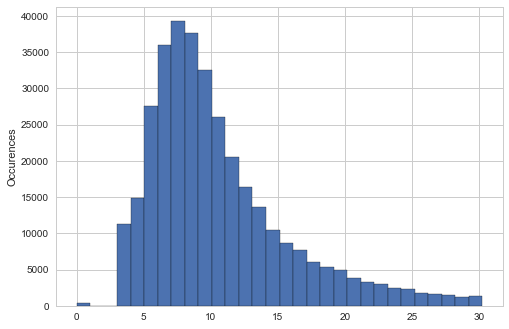

In [6]:
h.buildHistogram(all["trip_total"])

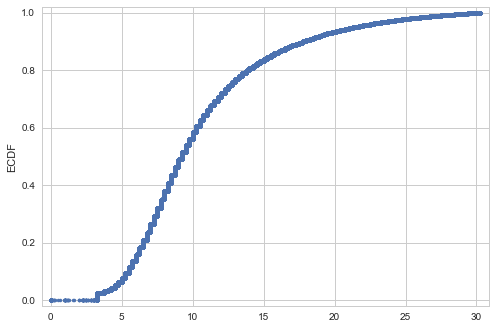

In [7]:
h.buildECDF(all["trip_total"])

In [8]:
all["trip_total"].describe()

count    397566.000000
mean         16.569367
std          31.026153
min           0.000000
25%           7.330000
50%          10.000000
75%          16.500000
max        9050.920000
Name: trip_total, dtype: float64

## Comparing seasonal earnings

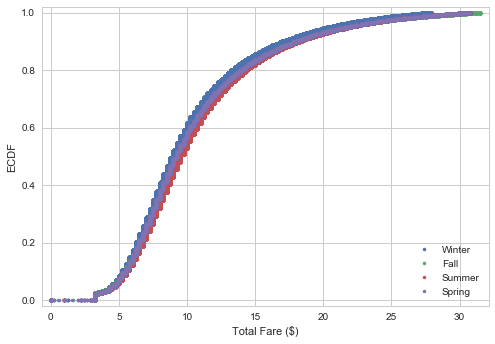

In [9]:
# Generate CDFs
x_winter, y_winter = h.getECDF(winter["trip_total"])
x_fall, y_fall = h.getECDF(fall["trip_total"])
x_summer, y_summer = h.getECDF(summer["trip_total"])
x_spring, y_spring = h.getECDF(spring["trip_total"])

# plot CDFs
_ = plt.plot(x_winter, y_winter, marker = ".", linestyle = "none")
_ = plt.plot(x_fall, y_fall, marker = ".", linestyle = "none")
_ = plt.plot(x_summer, y_summer, marker = ".", linestyle = "none")
_ = plt.plot(x_spring, y_spring, marker = ".", linestyle = "none")

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('Winter', 'Fall', 'Summer', 'Spring'), loc='lower right')

_ = plt.xlabel("Total Fare ($)")
_ = plt.ylabel("ECDF")
plt.show()

It's bit hard to tell but Summer might yield better earnings than Winter. One possible reason is that people might be more open to going out to events during the Summer than Winter. Let's take a better look.

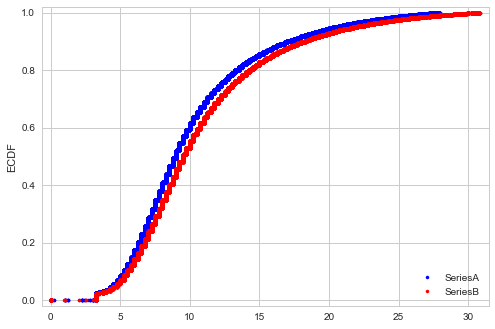

In [10]:
# compare summer and winter earnings
h.compareCDF(winter["trip_total"], summer["trip_total"])

Let's test out this hypothesis. 

* H0 = There is no difference between Summer and Winter earnings.
* H1 = There is a difference between Summer and Winter earnings. 

In [11]:
winterEarnings = np.array(winter["trip_total"])
summerEarnings = np.array(summer["trip_total"])
springEarnings = np.array(spring["trip_total"])
fallEarnings = np.array(fall["trip_total"])

Are the earnings for the 2 seasons different? If they are identical, they should have the same mean earnings so the difference in the mean earnings should be zero. We'll choose the difference in mean as our test statistic. The P-Value tells you that the percentage of chance that you would get the difference of means observed in the experiment if the earnings yields are exactly the same. 

In [12]:
h.identicalMeans(summerEarnings, winterEarnings, 10000)

Empirical Difference in Means: 1.48882391723
P-Value: 0.0


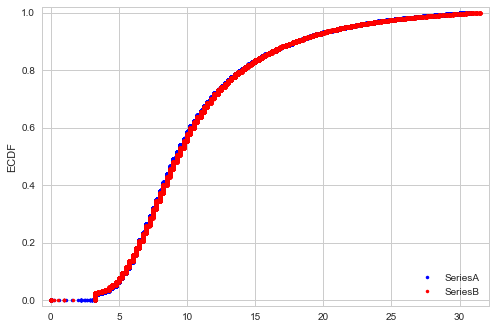

In [13]:
# compare summer and winter earnings
h.compareCDF(spring["trip_total"], fall["trip_total"])

In [14]:
h.identicalMeans(fallEarnings, springEarnings, 10000)

Empirical Difference in Means: 0.460086050862
P-Value: 0.0


What about Fall and Summer?

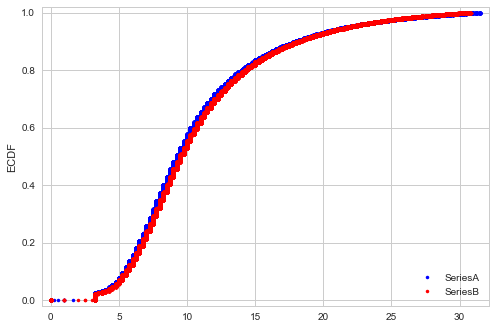

In [15]:
h.compareCDF(fall["trip_total"], summer["trip_total"])

In [16]:
h.identicalMeans(fallEarnings, summerEarnings, 10000)

Empirical Difference in Means: -0.116447458535
P-Value: 0.6908


## Comparing taxi companies

Is there a real difference between first place and last place? If so, where do they pick up/drop off their passengers? To find out, I need obtain records with Pickup/Dropoff locations. Unfortunately, some companies do not publish their locations so we can only work with what we have. 

In [36]:
# drop trip records that do not have company name, pickup/dropoff locations
interestedTrips = all.dropna(subset = ["company", "pickup_community_area", "dropoff_community_area"])

taxiCompanies = set(np.array(interestedTrips["company"]))
taxiCompanies = list(taxiCompanies)
print(taxiCompanies)

['6747 - Mueen Abdalla', '2823 - 73307 Seung Lee', '3094 - 24059 G.L.B. Cab Co', '3623 - 72222 Arrington Enterprises', '2733 - 74600 Benny Jona', '3591 - 63480 Chuks Cab', '3319 - CD Cab Co', '6488 - 83287 Zuha Taxi', 'Suburban Dispatch LLC', '5129 - 87128', '5006 - 39261 Salifu Bawa', '6742 - 83735 Tasha ride inc', '585 - 88805 Valley Cab Co', '2241 - 44667 - Felman Corp, Manuel Alonso', '0694 - 59280 Chinesco Trans Inc', 'Top Cab Affiliation', '5997 - 65283 AW Services Inc.', '2241 - 44667 Manuel Alonso', 'KOAM Taxi Association', '4197 - 41842 Royal Star', 'Chicago Medallion Leasing INC', '0118 - 42111 Godfrey S.Awir', '6574 - Babylon Express Inc.', 'Dispatch Taxi Affiliation', 'Northwest Management LLC', '5874 - 73628 Sergey Cab Corp.', '3152 - 97284 Crystal Abernathy', 'Taxi Affiliation Services', 'Blue Ribbon Taxi Association Inc.', '3201 - CD Cab Co Inc', '3620 - 52292 David K. Cab Corp.', '3011 - 66308 JBL Cab Inc.', 'Chicago Medallion Management', 'Choice Taxi Association', '40

In [39]:
meanEarnings = interestedTrips.groupby(["company"])["trip_total"] \
    .agg(["mean", "count"]).sort_values("mean", ascending = False).reset_index()

# We only care about Taxi companies that make at least 100 trips in 2016
meanEarnings = meanEarnings[meanEarnings["count"] >= 100].reset_index(drop = True)

meanEarnings

,company,mean,count
0,Choice Taxi Association,16.420143,20668
1,Top Cab Affiliation,15.730548,5439
2,KOAM Taxi Association,15.655414,6527
3,Dispatch Taxi Affiliation,15.091617,33073
4,Taxi Affiliation Services,15.044829,101774
5,Chicago Medallion Leasing INC,14.513365,4369
6,Blue Ribbon Taxi Association Inc.,14.337308,25390
7,Northwest Management LLC,13.982119,10145
8,3011 - 66308 JBL Cab Inc.,13.978571,105
9,Chicago Medallion Management,13.337033,1466


In [45]:
first = meanEarnings.head(1)["company"].iloc[0]
print("First:", first)

last = meanEarnings.tail(1)["company"].iloc[0]
print("Last:", last)

firstDf = interestedTrips[interestedTrips["company"] == first]
lastDf = interestedTrips[interestedTrips["company"] == last]

First: Choice Taxi Association
Last: Chicago Elite Cab Corp. (Chicago Carriag


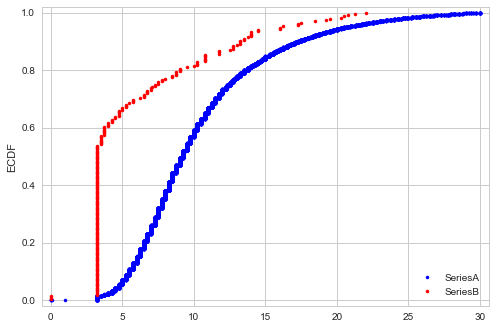

Empirical Difference in Means: 7.459831932519958
P-Value: 0.0


In [46]:
h.compareCDF(firstDf["trip_total"], lastDf["trip_total"])
h.identicalMeans(firstDf["trip_total"], lastDf["trip_total"], 10000)

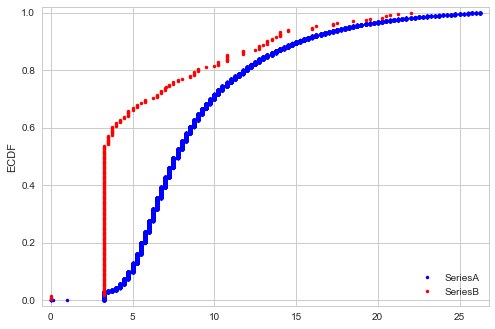

Empirical Difference in Means: 4.791177007031299
P-Value: 0.0


In [47]:
h.compareCDF(firstDf["fare"], lastDf["fare"])
h.identicalMeans(firstDf["fare"], lastDf["fare"], 10000)

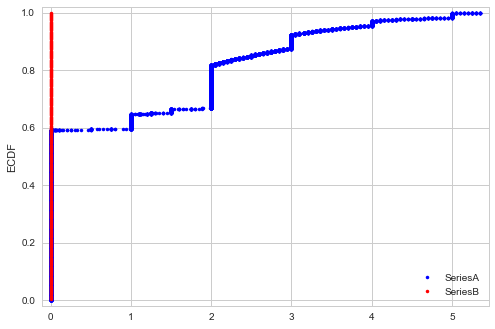

Empirical Difference in Means: 1.7651616024772578
P-Value: 0.0


In [52]:
h.compareCDF(firstDf["tips"], lastDf["tips"])
h.identicalMeans(firstDf["tips"], lastDf["tips"], 10000)

### Joining socioeconomic data

In [60]:
firstDf.head()

,taxi_id,tolls,trip_start_timestamp,trip_end_timestamp,company,dropoff_centroid_longitude,dropoff_centroid_latitude,fare,payment_type,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,pickup_community_area,tips,trip_miles,trip_seconds,trip_total,season
1948772,a149c6df861b2eff6f27491e024e37d2c3705aa5399c31...,0.0,10/15/2016 02:15 AM,10/15/2016 02:15 AM,Choice Taxi Association,-87.663416,41.986712,7.75,Cash,41.944227,-87.655998,77.0,6.0,0.0,1.9,420.0,8.75,Fall
1793223,24ed31a940cc30f89118796ee39ca35a52fdbade26c91f...,0.0,10/12/2016 12:00 PM,10/12/2016 12:00 PM,Choice Taxi Association,-87.618868,41.890922,4.25,Cash,41.884987,-87.620993,8.0,32.0,0.0,0.4,120.0,5.25,Fall
1554967,c2b5d2c9d25be474a1378d6238dd5c34cec73a614288ff...,0.0,10/06/2016 10:15 PM,10/06/2016 10:15 PM,Choice Taxi Association,-87.640698,41.943155,10.25,Cash,41.898332,-87.620763,6.0,8.0,0.0,3.0,360.0,10.25,Fall
351636,4985679c5d03d534d606702c915a7c74f83edb456f886e...,0.0,09/09/2016 10:00 AM,09/09/2016 10:15 AM,Choice Taxi Association,-87.632746,41.880994,8.00,Cash,41.884987,-87.620993,32.0,32.0,0.0,1.2,660.0,9.50,Fall
557292,1044814618b170d06ac8a2941ee73bce37f3f48e4848c5...,0.0,09/15/2016 01:45 PM,09/15/2016 01:45 PM,Choice Taxi Association,-87.903040,41.979071,3.25,Cash,41.979071,-87.903040,76.0,76.0,0.0,0.0,0.0,3.25,Fall


In [61]:
len(firstDf)

20668

In [65]:
econ["CommunityAreaNumber"] = econ["CommunityAreaNumber"].astype("float").fillna(0.0)

In [66]:
econ.head()

,CommunityAreaNumber,CommunityAreaName,PercentHousingCrowded,PercentBelowPoverty,PercentUnemployed,PercentNoHsDiploma,PercentUnder18OrOver64,PercentCapitaIncome,HardshipIndex
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [67]:
firstEcon = pd.merge(firstDf, econ, left_on = "pickup_community_area", right_on = "CommunityAreaNumber", how = "inner")
len(firstEcon)

20668

In [68]:
firstEcon.head()

,taxi_id,tolls,trip_start_timestamp,trip_end_timestamp,company,dropoff_centroid_longitude,dropoff_centroid_latitude,fare,payment_type,pickup_centroid_latitude,...,season,CommunityAreaNumber,CommunityAreaName,PercentHousingCrowded,PercentBelowPoverty,PercentUnemployed,PercentNoHsDiploma,PercentUnder18OrOver64,PercentCapitaIncome,HardshipIndex
0,a149c6df861b2eff6f27491e024e37d2c3705aa5399c31...,0.0,10/15/2016 02:15 AM,10/15/2016 02:15 AM,Choice Taxi Association,-87.663416,41.986712,7.75,Cash,41.944227,...,Fall,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5
1,3faf465f2a9568fcd32838685114495ac74f11a3cf17d4...,0.0,09/18/2016 04:45 AM,09/18/2016 04:45 AM,Choice Taxi Association,-87.655998,41.944227,4.75,Credit Card,41.944227,...,Fall,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5
2,a5af44e477d4a113284fc380e77366cecd26cf2d5dcf66...,0.0,10/23/2016 11:15 AM,10/23/2016 11:15 AM,Choice Taxi Association,-87.655998,41.944227,4.75,Cash,41.944227,...,Fall,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5
3,51813ca3c4499e57ee53c57118a41dfb15c53a5a398a21...,0.0,09/07/2016 05:15 PM,09/07/2016 06:15 PM,Choice Taxi Association,-87.913625,41.980264,42.00,Credit Card,41.944227,...,Fall,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5
4,fc4ee6b2bbcda6cbc48b7fa94b2cec5763df3b0de55496...,0.0,09/19/2016 10:45 PM,09/19/2016 11:00 PM,Choice Taxi Association,-87.642649,41.879255,20.00,Cash,41.946295,...,Fall,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5
